In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# read and append duopoly datasets

#### Run this just once. After that, comment it and run other cells!
data = pd.read_stata("..\\results\\Duopoly Simluation Results - sqrt n - chunk 1.dta")
list = data.loc[:, "chosen_ad_1": "chosen_ad_15"].columns.to_list()
list += (data.loc[:, "chosen_ad_y_1": "chosen_ad_y_15"].columns.to_list())
list += (data.loc[:, ['event_no']].columns.to_list())
data = data.filter(items=list)

for i in range(2, 16):
    data_chunk = pd.read_stata(f"..\\results\\Duopoly Simluation Results - sqrt n - chunk {i}.dta")
    data_chunk = data_chunk.filter(items=list)
    print(f"Chunk {i} Loaded!")
    data = pd.concat([data, data_chunk], axis=0)
    print(f"Chunk {i} Merged!")

data.to_stata(f"..\\results\Duopoly Simluation Outcomes - sqrt n.dta")

KeyboardInterrupt: 

In [6]:
# main_data = pd.DataFrame(columns=['ad', 'ctr', 'event_no'])
# for ad_no in range(1, 16):
#     ad_var_name = f"chosen_ad_{ad_no}"
#     ctr_var_name = f"chosen_ad_y_{ad_no}"
#     data_temp = data.loc[:, [ad_var_name, ctr_var_name, 'event_no']]
#     data_temp.rename(columns = {ad_var_name:'ad', ctr_var_name:'ctr'}, inplace = True) 
#     data_temp
#     # print(data_temp)
#     main_data = pd.concat([main_data, data_temp], axis=0)
# main_data = main_data.dropna()
# main_data.to_stata(f"..\\results\\Duopoly Simluation Outcomes.dta")

Empty DataFrame
Columns: [ad, ctr, event_no]
Index: []


In [144]:
# monopoly_data = pd.read_stata(f"..\\results\\Simluation Results.dta")
# main_data = pd.DataFrame(columns=['ad', 'ctr', 'event_no'])
# for ad_no in range(1, 16):
#     ad_var_name = f"chosen_ad_{ad_no}"
#     ctr_var_name = f"chosen_ad_y_{ad_no}"
#     data_temp = monopoly_data.loc[:, [ad_var_name, ctr_var_name, 'event_no']]
#     data_temp.rename(columns = {ad_var_name:'ad', ctr_var_name:'ctr'}, inplace = True) 
#     data_temp
#     # print(data_temp)
#     main_data = pd.concat([main_data, data_temp], axis=0)

# main_data = main_data.dropna(how='any')
# main_data.to_stata(f"..\\results\\Monopoly Simluation Outcomes.dta")

In [2]:
duopoly_data = pd.read_stata(f"..\\results\\Duopoly Simluation Outcomes.dta")

In [3]:
monopoly_data = pd.read_stata(f"..\\results\\Monopoly Simluation Outcomes.dta")

In [7]:
monopoly_data

,index,ad,ctr,event_no
0,0,83.0,0.005610,1.0
1,1,45.0,0.005811,2.0
2,2,45.0,0.005271,3.0
3,3,83.0,0.008486,4.0
4,4,73.0,0.006573,9.0
...,...,...,...,...
26154477,4816414,20.0,0.002323,17615728.0
26154478,4816484,99.0,0.001778,17615956.0
26154479,4816543,64.0,0.002766,17616128.0
26154480,4816576,1.0,0.002214,17616218.0


In [4]:
duopoly_data

,level_0,index,ad,ctr,event_no
0,0,0,80.0,0.005606,9.0
1,1,1,80.0,0.005431,10.0
2,2,2,73.0,0.006561,128.0
3,3,3,80.0,0.003481,125.0
4,4,4,79.0,0.000240,122.0
...,...,...,...,...,...
26154477,72249728,394243,4.0,0.000849,17615172.0
26154478,72249752,394267,94.0,0.001121,17615526.0
26154479,72249797,394312,4.0,0.000932,17615728.0
26154480,72249822,394337,91.0,0.000887,17615956.0


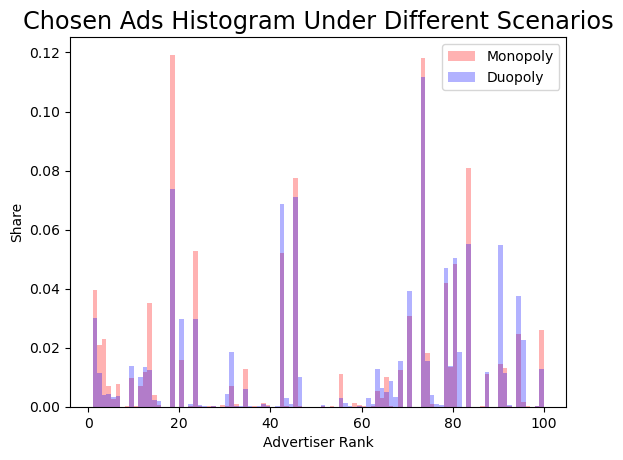

In [16]:
fig, ax = plt.subplots()

ax.hist(monopoly_data['ad'], bins=99, density=True, alpha=0.3, label='Monopoly', color='red')
ax.hist(duopoly_data['ad'], bins=99, density=True, alpha=0.3, label='Duopoly', color='blue')

ax.set_xlabel('Advertiser Rank')
ax.set_ylabel('Share')
ax.set_title('Chosen Ads Histogram Under Different Scenarios', fontsize='xx-large')

ax.legend()
plt.savefig(f"..\\results\\split 1\\figures\\Chosen Ads Hist.jpg", dpi=600)
plt.show()


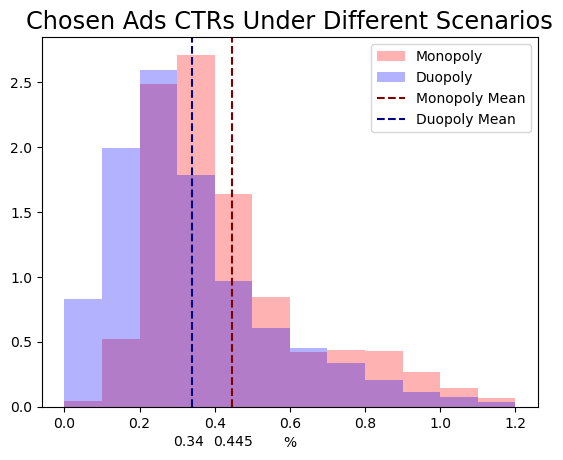

In [55]:
# plt.hist(monopoly_data['ctr'] * 100, range = (0, 1.2), density = True, alpha=0.8, bins=12)
# plt.hist(duopoly_data['ctr'] * 100, range = (0, 1.2), density = True, alpha=0.8, bins=12)
# plt.xlabel('%')
# plt.axvline(x=np.mean(duopoly_data['ctr']) * 100, color='maroon', linestyle='dashed')
# plt.title('Chosen Ads CTRs Under Duopoly')
# plt.show()

fig, ax = plt.subplots()

ax.hist(monopoly_data['ctr'] * 100, range = (0, 1.2), bins=12, density=True, alpha=0.3, label='Monopoly', color='red')
ax.hist(duopoly_data['ctr'] * 100, range = (0, 1.2), bins=12, density=True, alpha=0.3, label='Duopoly', color='blue')

ax.axvline(x=np.mean(monopoly_data['ctr']) * 100, color='maroon', linestyle='dashed', label='Monopoly Mean')
ax.axvline(x=np.mean(duopoly_data['ctr']) * 100, color='navy', linestyle='dashed', label='Duopoly Mean')

ax.text(np.mean(monopoly_data['ctr']) * 100 - 0.05, -0.3 , f"{round(100 * np.mean(monopoly_data['ctr']),3)}")
ax.text(np.mean(duopoly_data['ctr']) * 100 - 0.05, -0.3 , f"{round(100 * np.mean(duopoly_data['ctr']),3)}")

ax.set_xlabel('%')
# ax.set_ylabel('Share')
ax.set_title('Chosen Ads CTRs Under Different Scenarios', fontsize='xx-large')

ax.legend()
plt.savefig(f"..\\results\\split 1\\figures\\CTRs Hist.jpg", dpi=600)
plt.show()

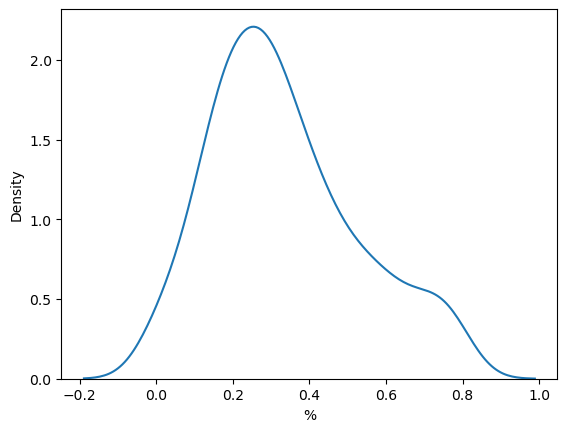

In [130]:
# sns.kdeplot(duopoly_data[duopoly_data['ctr'] < 8e-3].loc[0:1000000, 'ctr'] * 100, bw_adjust=5)
# plt.xlabel('%')
# plt.show()
# # plt.axvline(x=np.mean(duopoly_data['ctr']) * 100, color='maroon', linestyle='dashed')

In [4]:
monopoly_data_agg = monopoly_data.groupby('ad')['ctr'].agg(['mean', 'std', 'sum'])
duopoly_data_agg = duopoly_data.groupby('ad')['ctr'].agg(['mean', 'std', 'sum'])

In [5]:
monopoly_data_agg['imp'] = monopoly_data_agg['sum'] / monopoly_data_agg['mean'] 
duopoly_data_agg['imp'] = duopoly_data_agg['sum'] / duopoly_data_agg['mean'] 

In [43]:
monopoly_data_agg

,mean,std,sum,imp
ad,,,,
1.0,0.003571,0.001885,3690.767019,1033443.0
2.0,0.003123,0.002638,1698.681484,543973.0
3.0,0.004535,0.003403,2706.652774,596870.0
4.0,0.004752,0.008913,862.726502,181545.0
5.0,0.008715,0.022533,593.447500,68094.0
...,...,...,...,...
95.0,0.004023,0.007322,153.637958,38191.0
96.0,0.005494,0.002304,14.971791,2725.0
98.0,0.001836,0.001144,4.787281,2608.0


In [42]:
duopoly_data_agg
# only 86 ads shown. 14 ads not shown at all.

,mean,std,sum,imp
ad,,,,
1.0,0.002846,0.001868,2236.455535,785791.0
2.0,0.002262,0.001530,676.342522,298992.0
3.0,0.004755,0.011355,505.034456,106208.0
4.0,0.002738,0.004731,317.998899,116127.0
5.0,0.003514,0.008478,292.213638,83168.0
...,...,...,...,...
94.0,0.002800,0.002390,2759.234410,985399.0
95.0,0.001122,0.002249,663.100855,591123.0
98.0,0.001236,0.002238,10.514346,8507.0


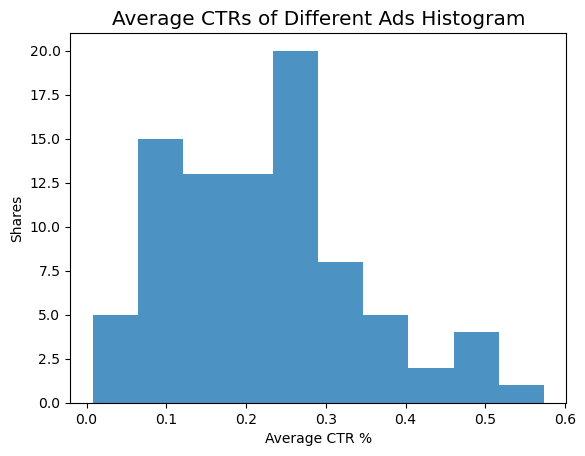

In [68]:
plt.hist(duopoly_data_agg['mean'] * 100, alpha=0.8)
plt.xlabel('Average CTR %')
plt.ylabel('Shares')
plt.title('Average CTRs of Different Ads Histogram', fontsize='x-large')
# plt.axvline(x=np.average(duopoly_data_agg['mean'], weights=duopoly_data_agg['imp']) * 100, color='red', alpha=0.6)
plt.show()

In [6]:
vals_data = pd.read_stata("..\\data\\Estimated Valuations.dta")

In [7]:
# merge with valuations data

# vals_data.rename(columns={'advertiser_rank': 'ad'})
duopoly_data_joint = pd.merge(duopoly_data_agg, vals_data, right_on='advertiser_rank', left_index=True)
monopoly_data_joint = pd.merge(monopoly_data_agg, vals_data, right_on='advertiser_rank', left_index=True)

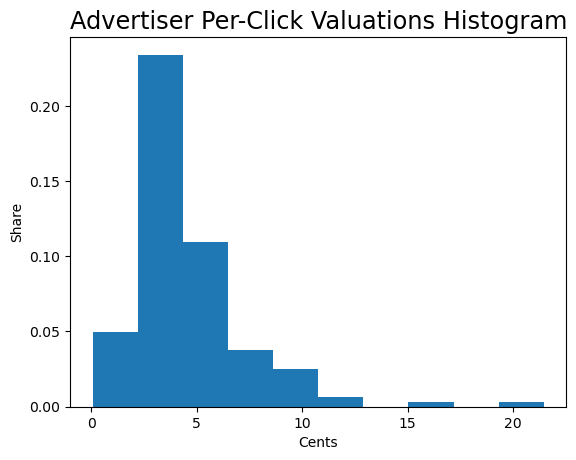

In [58]:
plt.hist(vals_data[vals_data['advertiser_rank']<= 150]['advertiser_val_cents'], density=True, bins=10)
plt.xlabel('Cents')
plt.ylabel('Share')
plt.title('Advertiser Per-Click Valuations Histogram', fontsize='xx-large')
plt.savefig(f"..\\results\\figures\\CTRs Hist.jpg", dpi=600)
plt.show()

In [9]:
duopoly_data_joint['advertiser_val_per_imp'] = duopoly_data_joint['advertiser_val_cents'] * duopoly_data_joint['mean']
monopoly_data_joint['advertiser_val_per_imp'] = monopoly_data_joint['advertiser_val_cents'] * monopoly_data_joint['mean']

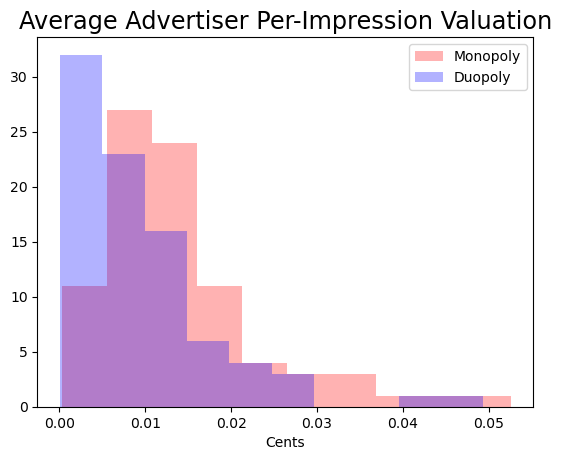

In [76]:
fig, ax = plt.subplots()

ax.hist(monopoly_data_joint['advertiser_val_per_imp'], alpha=0.3, label='Monopoly', color='red')
ax.hist(duopoly_data_joint['advertiser_val_per_imp'], alpha=0.3, label='Duopoly', color='blue')

# ax.axvline(x=np.mean(monopoly_data['ctr']) * 100, color='maroon', linestyle='dashed', label='Monopoly Mean')
# ax.axvline(x=np.mean(duopoly_data['ctr']) * 100, color='navy', linestyle='dashed', label='Duopoly Mean')

# ax.text(np.mean(monopoly_data['ctr']) * 100 - 0.05, -0.3 , f"{round(100 * np.mean(monopoly_data['ctr']),3)}")
# ax.text(np.mean(duopoly_data['ctr']) * 100 - 0.05, -0.3 , f"{round(100 * np.mean(duopoly_data['ctr']),3)}")

ax.set_xlabel('Cents')
# ax.set_ylabel('Share')
ax.set_title('Average Advertiser Per-Impression Valuation', fontsize='xx-large')

ax.legend()
plt.savefig(f"..\\results\\split 1\\figures\\Valuations Per Impression.jpg", dpi=600)
plt.show()



# plt.hist(duopoly_data_joint['advertiser_val_per_imp'])
# plt.title('Advertisers Average Valuation Per Impression Histogram')
# plt.xlabel('Cents')
# plt.show()

In [11]:
monopoly_data = pd.read_stata(f"..\\results\\Simluation Results.dta")

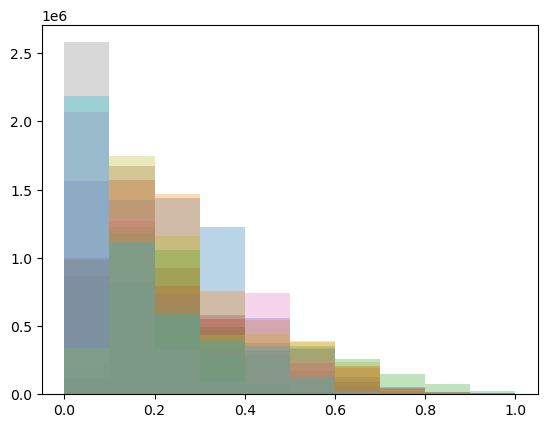

In [19]:
fig, ax = plt.subplots()


for i in range(1, 11):
    var_name = f"y_{i}"
    ax.hist(monopoly_data[var_name] * 100, range = (0, 1), alpha=0.3)

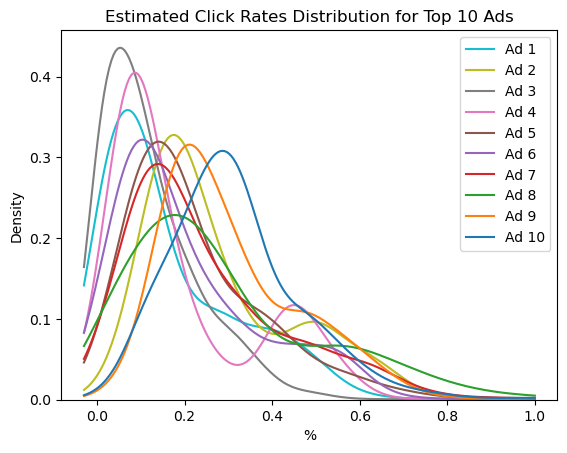

In [83]:


sns.kdeplot(monopoly_data.loc[0: 100000, 'y_1': 'y_10'] * 100, alpha=1, bw_adjust=3, fill=False, clip=[-0.03, 1])
plt.xlabel('%')
plt.title('Estimated Click Rates Distribution for Top 10 Ads')
list = []
for i in range(1,11): 
    name = f"Ad {i}"
    list.append(name)
plt.legend(list)
plt.savefig(f"..\\results\\figures\\Click Rates Distribution for Top 10 Ads.jpg", dpi=600)


In [81]:
list = []
for i in range(1,11): 
    name = f"Ad {i}"
    list.append(name)

NameError: name 'string' is not defined

In [66]:
monopoly_data

,index,global_token_new,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,...,y_90,y_91,y_92,y_93,y_94,y_95,y_96,y_98,y_99,y_100
0,0,1.0,0,0,0,0,0,0,0,0,...,0.001133,0.000069,0.000794,0.001547,0.003598,0.001230,0.001085,0.000982,0.000940,0.001975
1,1,1.0,0,0,0,0,0,0,0,0,...,0.000966,0.000556,0.000390,0.001304,0.002202,0.001047,0.001009,0.000806,0.001611,0.001929
2,2,1.0,0,0,0,0,0,0,0,0,...,0.000966,0.000556,0.000390,0.001304,0.002202,0.001047,0.001009,0.000806,0.001611,0.001929
3,3,2.0,0,0,0,0,0,0,0,0,...,0.001138,0.000611,0.001222,0.001332,0.002529,0.000000,0.000271,0.001354,0.000352,0.001707
4,4,3.0,0,0,0,0,0,0,0,0,...,0.003161,0.002663,0.002135,0.002452,0.003250,0.000583,0.001697,0.002834,0.003259,0.003575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816658,4816658,1617554.0,0,0,0,0,0,0,0,0,...,0.001317,0.002004,0.002057,0.001682,0.002386,0.001455,0.000672,0.002316,0.003042,0.002037
4816659,4816659,1617554.0,0,0,0,0,0,0,0,0,...,0.001317,0.002004,0.002057,0.001682,0.002386,0.001455,0.000672,0.002316,0.003042,0.002037
4816660,4816660,1617554.0,0,0,0,0,0,0,0,0,...,0.001317,0.002004,0.002057,0.001682,0.002386,0.001455,0.000672,0.002316,0.003042,0.002037
4816661,4816661,1617555.0,0,0,0,0,0,0,0,0,...,0.001088,0.001923,0.002214,0.002232,0.006373,0.002086,0.000818,0.001557,0.002748,0.002802
